In [ ]:
# تنصيب 
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# google colab هذه التعليمات تنقل كما هي وقبل ذلك وجب تحميل ملف على    
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json # هذا هو الملف
# الملف يتم تحميله من موقع kaggle

In [ ]:
# تحميل البيانات من الموقع مباشرة لكن وجب قبول القواعد في الموقع قبل ذلك 
# سوف يتم ذلك عن طريق تأكيد على رقم خاص بك
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# إستخراج البيانات
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is ectarctall')

The dataset is ectarctall


In [ ]:
# إستخراج البيانات
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is ectarctall')

The dataset is ectarctall


In [ ]:
# الدخول الى البيانات
import os
path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of image:',file_count)

Number of image: 25000


In [ ]:
# أسماء الملفات في المجلد
file_name = os.listdir('/content/train')
file_name

['cat.8990.jpg',
 'dog.3668.jpg',
 'cat.12414.jpg',
 'cat.3324.jpg',
 'dog.11734.jpg',
 'dog.1647.jpg',
 'cat.12278.jpg',
 'cat.2990.jpg',
 'dog.11782.jpg',
 'cat.4692.jpg',
 'cat.10674.jpg',
 'dog.5871.jpg',
 'cat.10566.jpg',
 'dog.660.jpg',
 'cat.9690.jpg',
 'dog.11843.jpg',
 'cat.7366.jpg',
 'dog.9979.jpg',
 'cat.7866.jpg',
 'cat.9819.jpg',
 'dog.11826.jpg',
 'cat.10995.jpg',
 'dog.5940.jpg',
 'dog.2051.jpg',
 'cat.9011.jpg',
 'cat.3754.jpg',
 'cat.6218.jpg',
 'cat.753.jpg',
 'dog.8637.jpg',
 'dog.1075.jpg',
 'cat.574.jpg',
 'dog.4464.jpg',
 'cat.2096.jpg',
 'cat.1499.jpg',
 'cat.10686.jpg',
 'cat.853.jpg',
 'dog.1219.jpg',
 'cat.8445.jpg',
 'cat.7755.jpg',
 'cat.3540.jpg',
 'dog.95.jpg',
 'cat.2671.jpg',
 'dog.7452.jpg',
 'cat.2345.jpg',
 'dog.6131.jpg',
 'dog.3009.jpg',
 'cat.12151.jpg',
 'dog.1016.jpg',
 'dog.916.jpg',
 'dog.1449.jpg',
 'cat.4337.jpg',
 'dog.10610.jpg',
 'cat.9600.jpg',
 'cat.8259.jpg',
 'cat.11420.jpg',
 'dog.711.jpg',
 'dog.7677.jpg',
 'cat.1496.jpg',
 'cat.140

In [ ]:
import numpy as np
from PIL import Image # للتعامل مع الصور
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow # لتحوبل مصفوفة الصورة الى صورة

In [ ]:
# قراءة الصورة على شكل مصفوفة 
img = mpimg.imread('/content/train/cat.9278.jpg')

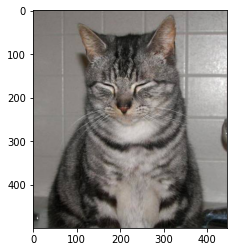

In [ ]:
plt.imshow(img)

In [ ]:
file_name = os.listdir('/content/train') # أسماء الملفات في المجلد
# فصل نوع الصورة عن بقية الأسم 
for i  in range(5):
  name = file_name[i]
  print(name[:3])

cat
dog
cat
cat
dog


In [ ]:
# معرفة عدد صور الكلاب والقطط
file_name = os.listdir('/content/train')
dog_count = 0
cat_count = 0
for img in file_name:
  name = img[:3]

  if name =='dog':
    dog_count += 1
  else:
    cat_count += 1


print('Number of dog image',dog_count)
print('Number of cat image',cat_count)


Number of dog image 12500
Number of cat image 12500


In [ ]:
# إنشاء ملف 
os.mkdir('/content/image resized')

FileExistsError: ignored

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

# اخذ 2000 صورة لبناء الشبكة العصبونية 
for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  new_img_path = resized_folder+filename
  img.save(new_img_path)


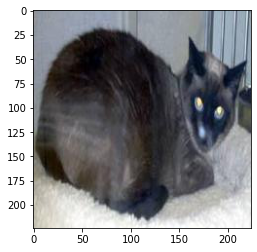

In [ ]:
img = mpimg.imread('/content/image resized/cat.10005.jpg')
plt.imshow(img)

In [ ]:
file_names = os.listdir('/content/image resized/')
len(file_names)

2000

In [ ]:
file_names = os.listdir('/content/image resized/')
# تسمية الكلب ب1
# تسمية القطة ب0
labels = []

for i in range(2000):
  filename = file_names[i]
  label = filename[:3]
  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)



In [ ]:
values,counts = np.unique(labels,return_counts=True)

In [ ]:
# اي لدينا 976 صورة قطة و 1024 صورة كلب
values,counts

(array([0, 1]), array([ 976, 1024]))

In [ ]:
import cv2 
import glob
from google.colab.patches import cv2_imshow


In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg'] 

files = []
# تمديد الملف ليحوي الصور 
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension] # *: للإختيار بين الاحقتين
# تحويل الصور الى مصفوفات 
dog_cat_image = np.asarray([cv2.imread(file) for file in files])


In [ ]:
dog_cat_image

array([[[[ 40,  53,  51],
         [ 76,  89,  87],
         [117, 128, 126],
         ...,
         [115, 144, 128],
         [114, 130, 153],
         [113, 122, 166]],

        [[ 32,  45,  43],
         [ 78,  91,  89],
         [120, 131, 129],
         ...,
         [ 99, 126, 110],
         [101, 116, 135],
         [115, 127, 163]],

        [[ 23,  34,  32],
         [ 61,  72,  70],
         [ 91, 102, 100],
         ...,
         [ 73,  98,  84],
         [ 78,  95, 104],
         [110, 124, 146]],

        ...,

        [[ 48,  39, 156],
         [ 20,  20, 104],
         [  0,  10,  32],
         ...,
         [186, 212, 224],
         [190, 214, 226],
         [191, 215, 227]],

        [[ 46,  39, 154],
         [ 20,  20, 104],
         [  0,  11,  30],
         ...,
         [185, 211, 223],
         [186, 212, 224],
         [188, 214, 226]],

        [[ 45,  38, 153],
         [ 20,  21, 102],
         [  0,  11,  30],
         ...,
         [184, 210, 222],
        

In [ ]:
cv2.imread('/content/image resized/cat.1000.jpg')

In [ ]:
type(dog_cat_image)

numpy.ndarray

In [ ]:
dog_cat_image.shape

(2000, 224, 224, 3)

In [ ]:
X = dog_cat_image
y = np.asarray(labels)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
# تحجيم مصفوفات الصور
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub # لتطبيق التدريب المسبق  

In [ ]:
# تحميل نموذج mobilenet
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' 
# pre_trained: هذه العملية تشير الى وجود نموذجين 
# يقوم النموذج الأول بالتدرب على البيانات ثم إستخدام هذا النموذج  لتدريب النموذج الثاني الذي نستخدمه للتوقع
pretrained_model = hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [ ]:
num_of_class = 2
model = tf.keras.Sequential([pretrained_model,
                             tf.keras.layers.Dense(num_of_class)
                             ])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# تجميع النموذج
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [ ]:
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 5s 42ms/step - loss: 0.1887 - accuracy: 0.9212
Epoch 2/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0753 - accuracy: 0.9744
Epoch 3/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0566 - accuracy: 0.9812
Epoch 4/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0461 - accuracy: 0.9850
Epoch 5/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0388 - accuracy: 0.9894


In [ ]:
# تقيم النموذج
score,acc =model.evaluate(X_test_scaled,y_test)
print('test loss',score)
print('test accuracy',acc)

13/13 [==============================] - 2s 73ms/step - loss: 0.0539 - accuracy: 0.9800
test loss 0.05387750267982483
test accuracy 0.9800000190734863


Path of the image to be predicted/content/dog.jpg


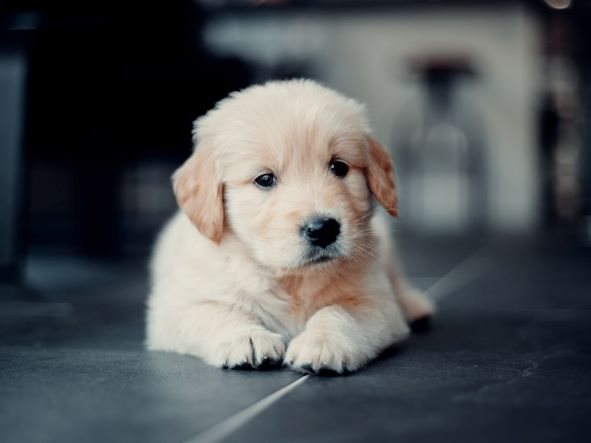

1/1 [==============================] - 1s 759ms/step
1
The image represents a Dog


In [ ]:
# إنشاء نظام توقع
input_image_path = input('Path of the image to be predicted')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/255

image_reshape = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshape)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==0:
  print('The image represents a Cat ')
else:
  print('The image represents a Dog')


Path of the image to be predicted/content/cat.jpg


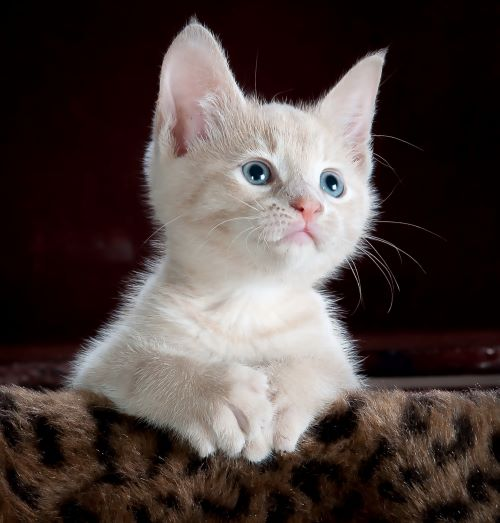

1/1 [==============================] - 0s 27ms/step
0
The image represents a Cat 


In [ ]:
# إنشاء نظام توقع
input_image_path = input('Path of the image to be predicted')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/255

image_reshape = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshape)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==0:
  print('The image represents a Cat ')
else:
  print('The image represents a Dog')
